In [3]:
install.packages("dplyr")
install.packages("ggplot2")
install.packages("tidyr")
library(dplyr)
library(tidyr)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [16]:
# Загрузка данных
car_data <- read.csv("car_price_prediction.csv")

In [17]:
str(car_data)

'data.frame':	19237 obs. of  18 variables:
 $ ID              : int  45654403 44731507 45774419 45769185 45809263 45802912 45656768 45816158 45641395 45756839 ...
 $ Price           : int  13328 16621 8467 3607 11726 39493 1803 549 1098 26657 ...
 $ Levy            : chr  "1399" "1018" "-" "862" ...
 $ Manufacturer    : chr  "LEXUS" "CHEVROLET" "HONDA" "FORD" ...
 $ Model           : chr  "RX 450" "Equinox" "FIT" "Escape" ...
 $ Prod..year      : int  2010 2011 2006 2011 2014 2016 2010 2013 2014 2007 ...
 $ Category        : chr  "Jeep" "Jeep" "Hatchback" "Jeep" ...
 $ Leather.interior: chr  "Yes" "No" "No" "Yes" ...
 $ Fuel.type       : chr  "Hybrid" "Petrol" "Petrol" "Hybrid" ...
 $ Engine.volume   : chr  "3.5" "3" "1.3" "2.5" ...
 $ Mileage         : chr  "186005 km" "192000 km" "200000 km" "168966 km" ...
 $ Cylinders       : num  6 6 4 4 4 4 4 4 4 6 ...
 $ Gear.box.type   : chr  "Automatic" "Tiptronic" "Variator" "Automatic" ...
 $ Drive.wheels    : chr  "4x4" "4x4" "Front" "4x4" 

In [18]:
# Удаление дубликатов
car_data <- distinct(car_data)

# Преобразование столбца Doors
car_data$Doors <- as.numeric(sub("^(\\d+)-.*", "\\1", car_data$Doors))

#удаление NA
car_data <- filter(car_data, !is.na(Doors))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [19]:
str(car_data)

'data.frame':	18800 obs. of  18 variables:
 $ ID              : int  45654403 44731507 45774419 45769185 45809263 45802912 45656768 45816158 45641395 45756839 ...
 $ Price           : int  13328 16621 8467 3607 11726 39493 1803 549 1098 26657 ...
 $ Levy            : chr  "1399" "1018" "-" "862" ...
 $ Manufacturer    : chr  "LEXUS" "CHEVROLET" "HONDA" "FORD" ...
 $ Model           : chr  "RX 450" "Equinox" "FIT" "Escape" ...
 $ Prod..year      : int  2010 2011 2006 2011 2014 2016 2010 2013 2014 2007 ...
 $ Category        : chr  "Jeep" "Jeep" "Hatchback" "Jeep" ...
 $ Leather.interior: chr  "Yes" "No" "No" "Yes" ...
 $ Fuel.type       : chr  "Hybrid" "Petrol" "Petrol" "Hybrid" ...
 $ Engine.volume   : chr  "3.5" "3" "1.3" "2.5" ...
 $ Mileage         : chr  "186005 km" "192000 km" "200000 km" "168966 km" ...
 $ Cylinders       : num  6 6 4 4 4 4 4 4 4 6 ...
 $ Gear.box.type   : chr  "Automatic" "Tiptronic" "Variator" "Automatic" ...
 $ Drive.wheels    : chr  "4x4" "4x4" "Front" "4x4" 

In [15]:
select(car_data, ID, Price, Manufacturer, Prod..year, Category, Color)

ID,Price,Manufacturer,Prod..year,Category,Color
<int>,<int>,<chr>,<int>,<chr>,<chr>
45654403,13328,LEXUS,2010,Jeep,Silver
44731507,16621,CHEVROLET,2011,Jeep,Black
45774419,8467,HONDA,2006,Hatchback,Black
45769185,3607,FORD,2011,Jeep,White
45809263,11726,HONDA,2014,Hatchback,Silver
45802912,39493,HYUNDAI,2016,Jeep,White
45656768,1803,TOYOTA,2010,Hatchback,White
45816158,549,HYUNDAI,2013,Sedan,Grey
45641395,1098,TOYOTA,2014,Sedan,Black


In [21]:
# Удаление выбросов для Price
Q1 <- quantile(car_data$Price, 0.25)
Q3 <- quantile(car_data$Price, 0.75)
IQR <- Q3 - Q1
car_data <- filter(car_data, car_data$Price >= (Q1 - 1.5 * IQR) & car_data$Price <= (Q3 + 1.5 * IQR))

In [22]:
# Логарифмическое преобразование Price
car_data$Log_Price <- log(car_data$Price + 1)

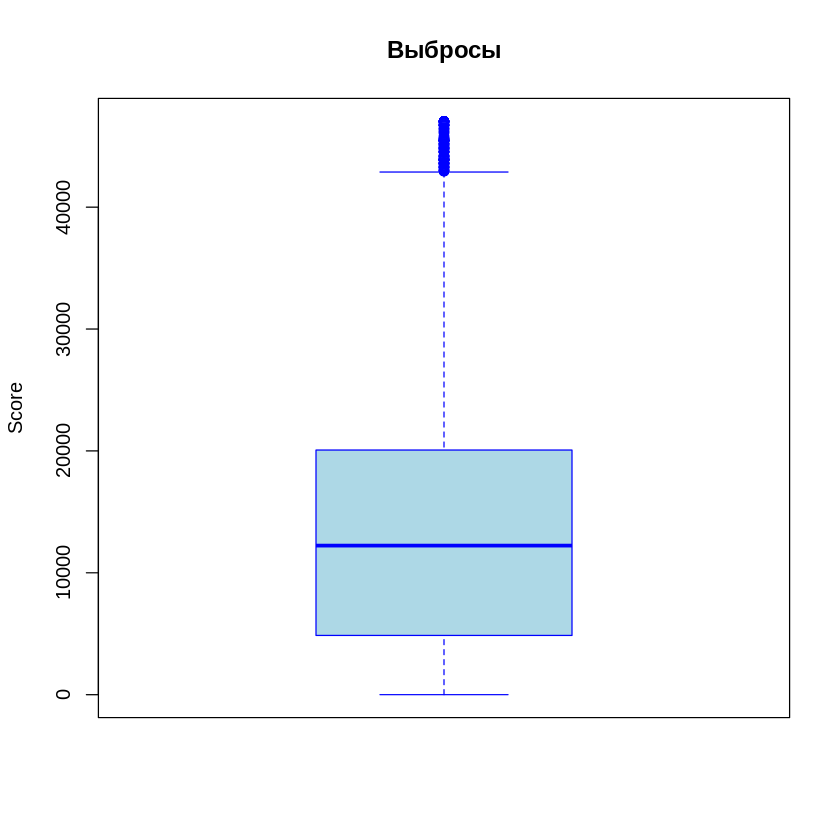

In [23]:
boxplot(car_data$Price,
        main="Выбросы",
        ylab="Score",
        col="lightblue",
        border="blue")

# Задача 1: Топ-10 марок машин по популярности:

Selecting by n


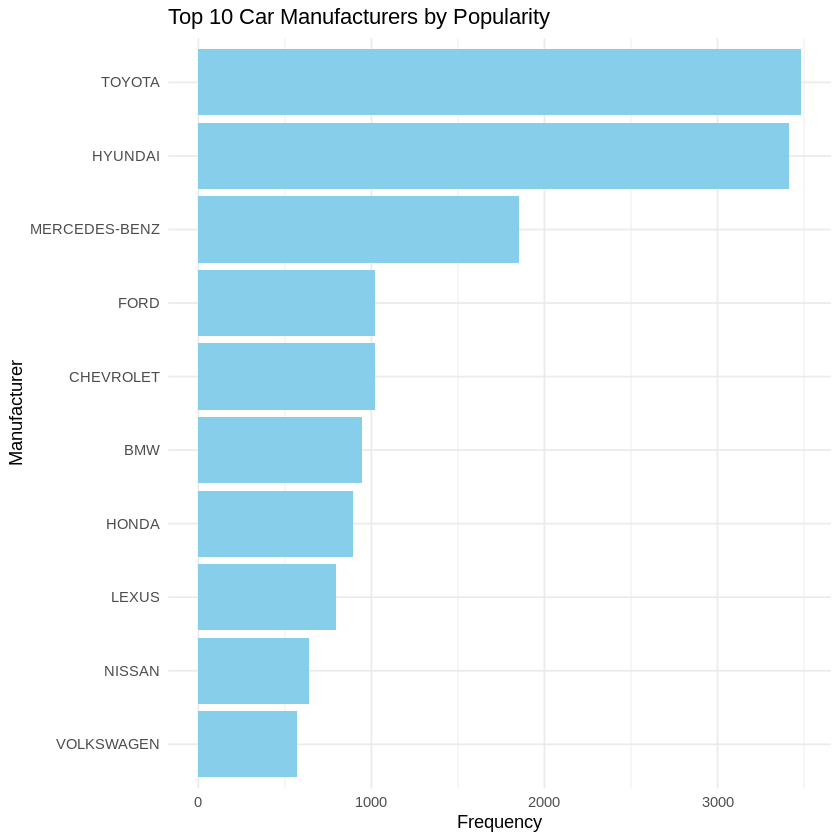

In [32]:
# Считаем количество по маркам и выбираем топ-10
top_manufacturers <- car_data %>%
  count(Manufacturer) %>%
  arrange(desc(n)) %>%
  top_n(10)

ggplot(top_manufacturers, aes(x=reorder(Manufacturer, n), y=n)) +
  geom_bar(stat="identity", fill="skyblue") +
  theme_minimal() +
  labs(title="Top 10 Car Manufacturers by Popularity", x="Manufacturer", y="Frequency") +
  coord_flip()

# Задача 2: Топ-10 марок машин по цене:


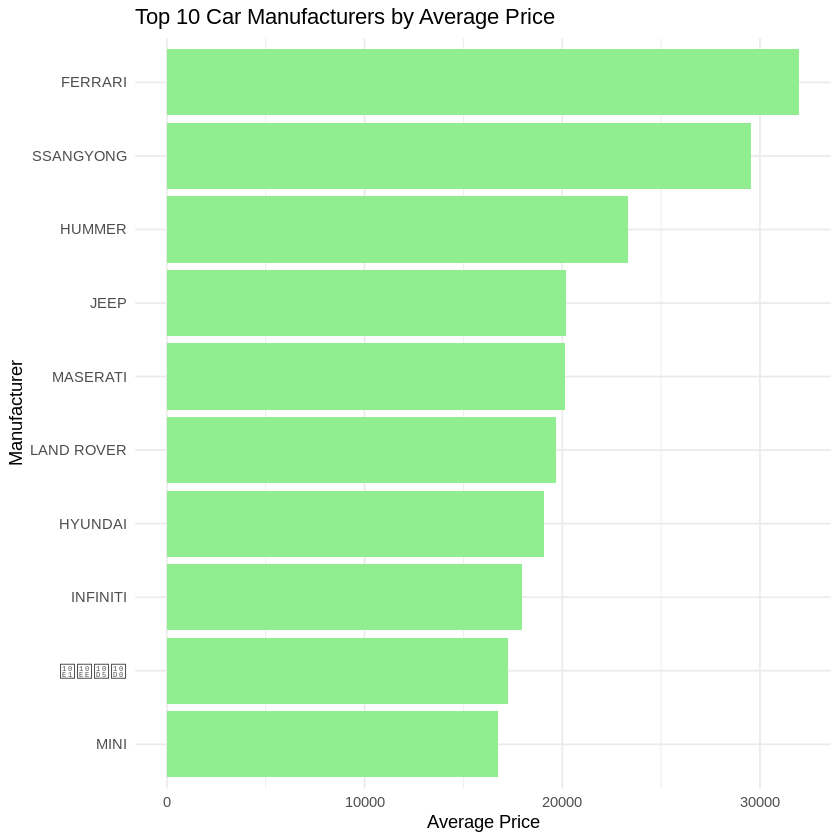

In [27]:
# Считаем среднюю цену по маркам и выбираем топ-10
top_prices <- car_data %>%
  group_by(Manufacturer) %>%
  summarise(Average_Price = mean(Price, na.rm = TRUE)) %>%
  top_n(10, Average_Price)

ggplot(top_prices, aes(x=reorder(Manufacturer, Average_Price), y=Average_Price)) +
  geom_bar(stat="identity", fill="lightgreen") +
  theme_minimal() +
  labs(title="Top 10 Car Manufacturers by Average Price", x="Manufacturer", y="Average Price") +
  coord_flip()

# Задача 3: Изменение цены в зависимости от года:

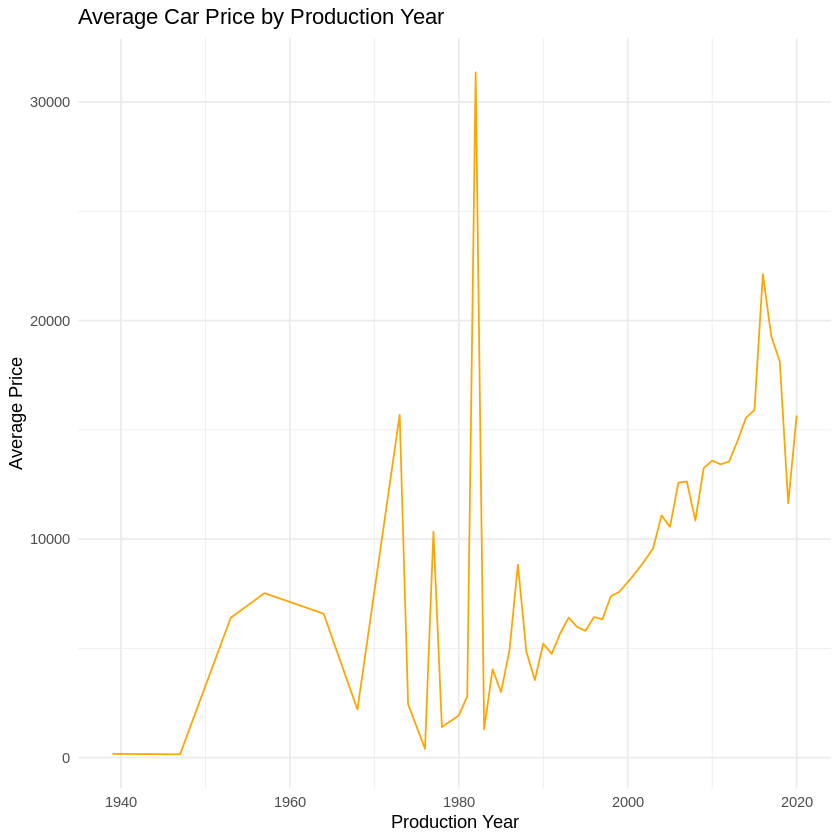

In [29]:
# Считаем среднюю цену по годам
price_by_year <- car_data %>%
  group_by(Prod..year) %>%
  summarise(Average_Price = mean(Price, na.rm = TRUE))

ggplot(price_by_year, aes(x=Prod..year, y=Average_Price)) +
  geom_line(color="orange") +
  theme_minimal() +
  labs(title="Average Car Price by Production Year", x="Production Year", y="Average Price")

# Задача 4: Гипотеза о джипах:


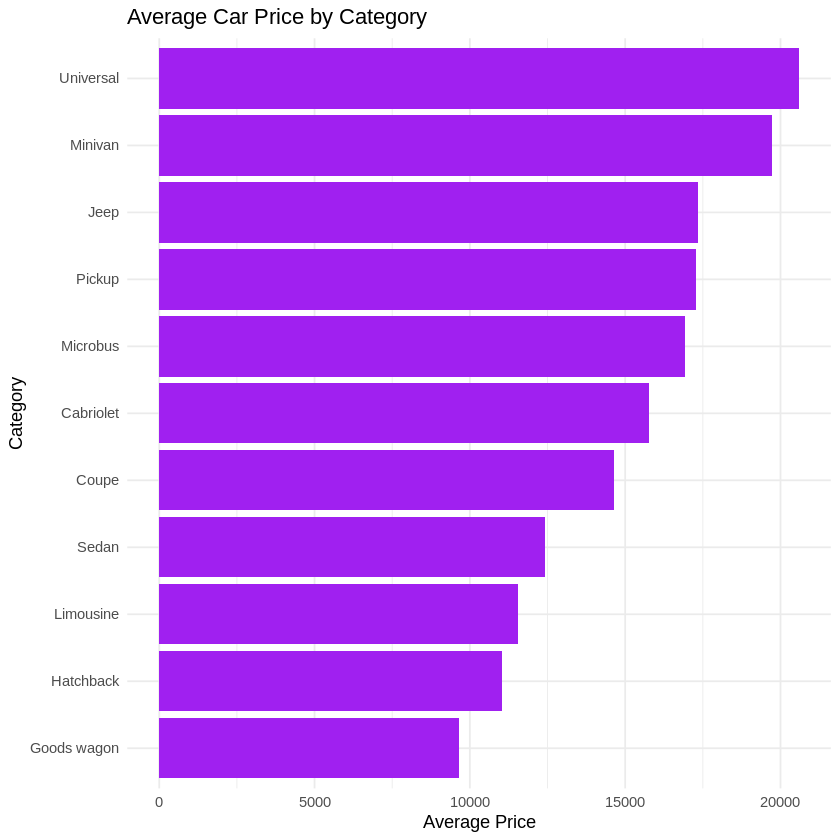

In [30]:
# Считаем среднюю цену по категориям
price_by_category <- car_data %>%
  group_by(Category) %>%
  summarise(Average_Price = mean(Price, na.rm = TRUE)) %>%
  arrange(desc(Average_Price))

ggplot(price_by_category, aes(x=reorder(Category, Average_Price), y=Average_Price)) +
  geom_bar(stat="identity", fill="purple") +
  theme_minimal() +
  labs(title="Average Car Price by Category", x="Category", y="Average Price") +
  coord_flip()


Проверить гипотезу: правда ли самые дорогие машины категории Джип?

Нет, самые дорогие машины - Универсалы

# Задача 5: Гипотеза о самом популярном цвете:

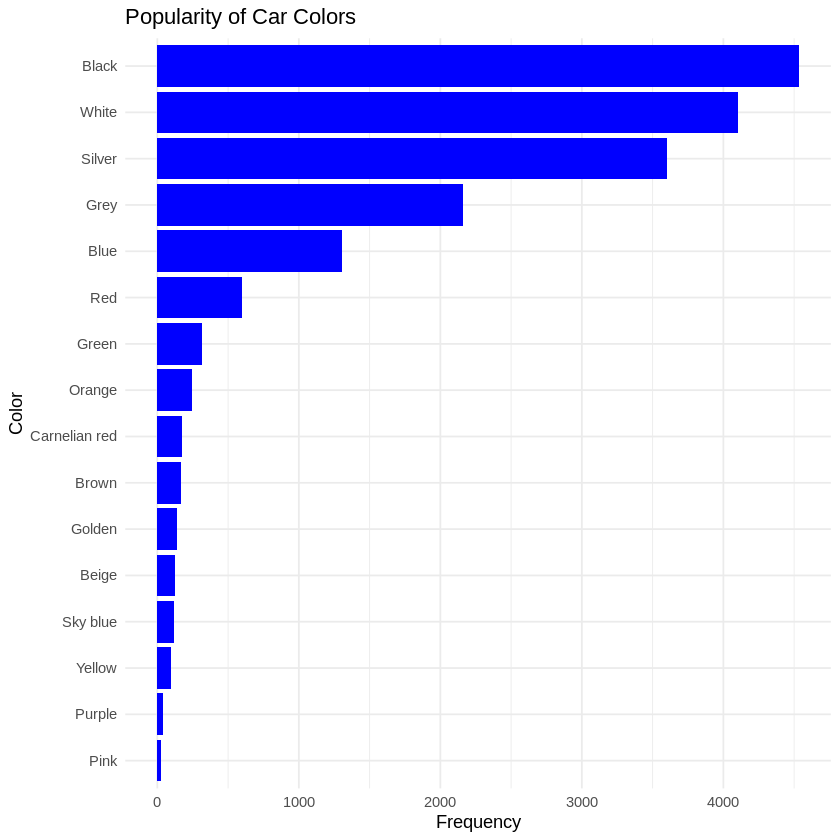

In [31]:
# Считаем количество по цветам
color_counts <- car_data %>%
  count(Color) %>%
  arrange(desc(n))

ggplot(color_counts, aes(x=reorder(Color, n), y=n)) +
  geom_bar(stat="identity", fill="blue") +
  theme_minimal() +
  labs(title="Popularity of Car Colors", x="Color", y="Frequency") +
  coord_flip()

Проверить гипотезу: правда ли самый популярный цвет у машин белый?

Самый популярный цвет не белый, а черный